In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/Users/udit/git projects/ML---Implimentations/Xgboost Implementation/Dataset/Travel.csv")

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
df.shape

(4888, 20)

In [8]:
# View all the Categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']

for feature in cat_features: 
    print(df[feature].value_counts())
    print("-----------------------------")

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
-----------------------------
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
-----------------------------
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
-----------------------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
-----------------------------
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
-----------------------------
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
-----------------------------


In [9]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [10]:
df['Gender'].value_counts(),df['MaritalStatus'].value_counts()

(Gender
 Male      2916
 Female    1972
 Name: count, dtype: int64,
 MaritalStatus
 Married      2340
 Unmarried    1598
 Divorced      950
 Name: count, dtype: int64)

In [11]:
# Columns with missing values
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

for feature in feature_with_na: 
    print(feature, np.round(df[feature].isnull().mean()* 100, 2))

Age 4.62
TypeofContact 0.51
DurationOfPitch 5.14
NumberOfFollowups 0.92
PreferredPropertyStar 0.53
NumberOfTrips 2.86
NumberOfChildrenVisiting 1.35
MonthlyIncome 4.77


#### Handling Missing Values

In [12]:
# Impute NaN Values 
fill_with_median = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']
fill_with_mode = ['TypeofContact','NumberOfFollowups','PreferredPropertyStar','NumberOfChildrenVisiting']

for feature in fill_with_mode: 
    df[feature] = df[feature].fillna(df[feature].mode()[0])
for feature in fill_with_median: 
    df[feature] = df[feature].fillna(df[feature].median())

In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

#### Drop Feature

In [14]:
df.drop('CustomerID', axis=1, inplace=True)

### **Feature Engineering**
#### Feature Extraction

In [15]:
# create a new column for feature 
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis=1, inplace=True)

In [ ]:
# all type of features
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print("no of numerical Features : ", len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("no of categorical features : ", len(cat_features))
discreate_features = [feature for feature in num_features if len(df[feature].unique()) < 25]
print("no of discreate features : ", len(discreate_features))
continuous_features = [feature for feature in num_features if feature not in discreate_features]
print("no of continuous features : ", len(continuous_features))

no of numerical Features :  12
no of categorical features :  6
no of discreate features :  9
no of continuous features :  3


In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


# Model Training

In [19]:
from sklearn.model_selection import train_test_split 
X = df.drop('ProdTaken', axis=1) 
y = df['ProdTaken']

In [20]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns 

for col in cat_features: 
    X[col] = X[col].astype(str).str.strip().str.lower()

In [21]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder() 

preprocessor = ColumnTransformer(
    [
        ('StandardScaler', numeric_transformer, num_features),
        ('Onehotencoder', ohe_transformer, cat_features)
    ]
)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.25, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
! pip install Xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.1 MB/s  0:00:01 eta 0:00:01


In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [27]:
def evaluate_matrix(true, predicted): 
    Score = accuracy_score(true,predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true,predicted)
    f1 = f1_score(true,predicted)
    roc_auc = roc_auc_score(true,predicted)
    return Score, precision, recall, f1, roc_auc

In [28]:
Models = { 
    'LogisticRegression' : LogisticRegression(),
    'GaussianNB' : GaussianNB(),
    'DecisionTree' : DecisionTreeClassifier(),
    'KNeighbours' : KNeighborsClassifier(),
    'SVC' : SVC(),
    'RandomForest' : RandomForestClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'Xgboost' : XGBClassifier()
}

In [31]:
for i in range(len(list(Models))): 
    model = list(Models.values())[i]
    model.fit(X_train,y_train)

    # Make Prediction 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train And Test Dataset 
    model_train_Score, model_train_precision, model_train_recall, model_train_f1, model_train_roc_auc = evaluate_matrix(y_train,y_train_pred) 
    model_test_Score, model_test_precision, model_test_recall, model_test_f1, model_test_roc_auc = evaluate_matrix(y_test,y_test_pred)


    print(list(Models.keys())[i]) 

    print("Model Performance Training Set")
    print('-Accuracy Score : {:.4f}'.format(model_train_Score))
    print('-Precision : {:.4f}'.format(model_train_precision))
    print('-Recall : {:.4f}'.format(model_train_recall))
    print('-f1 Score: {:.4f}'.format(model_train_f1))
    print('-ROC AUC Score : {:.4f}'.format(model_train_roc_auc))

    print('-------------------------------------------')

    print("Model Performance Test Set")
    print('-Accuracy Score : {:.4f}'.format(model_test_Score))
    print('-Precision : {:.4f}'.format(model_test_precision))
    print('-Recall : {:.4f}'.format(model_test_recall))
    print('-f1 Score: {:.4f}'.format(model_test_f1))
    print('-ROC AUC Score : {:.4f}'.format(model_test_roc_auc))

    print("="*50)
    print("\n")


LogisticRegression
Model Performance Training Set
-Accuracy Score : 0.8434
-Precision : 0.7043
-Recall : 0.3042
-f1 Score: 0.4248
-ROC AUC Score : 0.6371
-------------------------------------------
Model Performance Test Set
-Accuracy Score : 0.8453
-Precision : 0.6604
-Recall : 0.3139
-f1 Score: 0.4255
-ROC AUC Score : 0.6389


GaussianNB
Model Performance Training Set
-Accuracy Score : 0.8151
-Precision : 0.8276
-Recall : 0.0344
-f1 Score: 0.0661
-ROC AUC Score : 0.5164
-------------------------------------------
Model Performance Test Set
-Accuracy Score : 0.8232
-Precision : 0.8182
-Recall : 0.0404
-f1 Score: 0.0769
-ROC AUC Score : 0.5192


DecisionTree
Model Performance Training Set
-Accuracy Score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-f1 Score: 1.0000
-ROC AUC Score : 1.0000
-------------------------------------------
Model Performance Test Set
-Accuracy Score : 0.9133
-Precision : 0.7532
-Recall : 0.7803
-f1 Score: 0.7665
-ROC AUC Score : 0.8616


KNeighbours
Model Per

In [33]:
# Hyperparameter Tuning
Knn_params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,20]}
Xgboost_params = { 
    "learning_rate" : [0.1,0.01],
    "max_depth" : [5,8,12,20,30], 
    "n_estimators" : [100,200,300], 
    "colsample_bytree" : [0.5,0.8,1,0.3,0.4]
} 

In [34]:
randomcv_models = [ 
    ("Kneighbors", KNeighborsClassifier(), Knn_params),
    ("Xgboost", XGBClassifier(), Xgboost_params)
]

In [36]:
from sklearn.model_selection import RandomizedSearchCV 

model_params = {}
for name,model,params in randomcv_models: 
    random = RandomizedSearchCV( 
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train,y_train)
    model_params[name] = random.best_params_

for model_name in model_params: 
    print(f'---------------------------Best Param for {model_name}------------------------')
    print(model_params[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n

In [37]:
Models = { 
    'KNeighbours' : KNeighborsClassifier(n_neighbors = 3),
    'Xgboost' : XGBClassifier(n_estimators = 300, max_depth = 8, learning_rate = 0.1, colsample_bytree = 0.5)
}


for i in range(len(list(Models))): 
    model = list(Models.values())[i]
    model.fit(X_train,y_train)

    # Make Prediction 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train And Test Dataset 
    model_train_Score, model_train_precision, model_train_recall, model_train_f1, model_train_roc_auc = evaluate_matrix(y_train,y_train_pred) 
    model_test_Score, model_test_precision, model_test_recall, model_test_f1, model_test_roc_auc = evaluate_matrix(y_test,y_test_pred) 

    print(list(Models.keys())[i])

    print("Model Performance Training Set")
    print('-Accuracy Score : {:.4f}'.format(model_train_Score))
    print('-Precision : {:.4f}'.format(model_train_precision))
    print('-Recall : {:.4f}'.format(model_train_recall))
    print('-f1 Score: {:.4f}'.format(model_train_f1))
    print('-ROC AUC Score : {:.4f}'.format(model_train_roc_auc))

    print('-------------------------------------------')

    print("Model Performance Test Set")
    print('-Accuracy Score : {:.4f}'.format(model_test_Score))
    print('-Precision : {:.4f}'.format(model_test_precision))
    print('-Recall : {:.4f}'.format(model_test_recall))
    print('-f1 Score: {:.4f}'.format(model_test_f1))
    print('-ROC AUC Score : {:.4f}'.format(model_test_roc_auc))

    print("="*50)
    print("\n")

KNeighbours
Model Performance Training Set
-Accuracy Score : 0.9776
-Precision : 0.9583
-Recall : 0.9225
-f1 Score: 0.9401
-ROC AUC Score : 0.9565
-------------------------------------------
Model Performance Test Set
-Accuracy Score : 0.9173
-Precision : 0.8280
-Recall : 0.6906
-f1 Score: 0.7531
-ROC AUC Score : 0.8293


Xgboost
Model Performance Training Set
-Accuracy Score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-f1 Score: 1.0000
-ROC AUC Score : 1.0000
-------------------------------------------
Model Performance Test Set
-Accuracy Score : 0.9493
-Precision : 0.9497
-Recall : 0.7623
-f1 Score: 0.8458
-ROC AUC Score : 0.8767




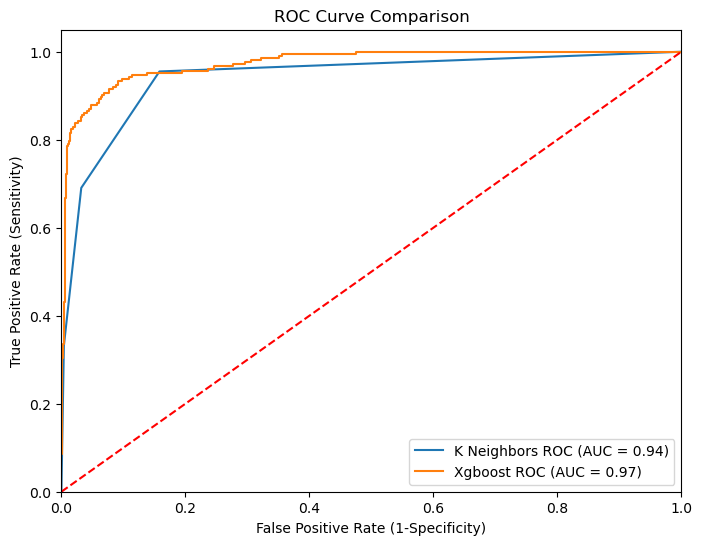

In [38]:
# Plot ROC AUC CURVE 
# Define your models
models = [
    {"label": "K Neighbors", "model" : KNeighborsClassifier(n_neighbors = 3)},
    {"label": "Xgboost", "model": XGBClassifier(n_estimators = 300, max_depth = 8, learning_rate = 0.1, colsample_bytree = 0.5)}
]

plt.figure(figsize=(8, 6))

# Loop through models
for algo in models:
    model = algo['model']
    model.fit(X_train, y_train)  # train model
    
    # Predict probabilities for positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute FPR, TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} ROC (AUC = {auc_score:.2f})")

# Plot reference line for random guessing
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")

plt.savefig("roc_comparison.png")
plt.show()